In [4]:
from google.colab import drive
import pandas as pd

# Google Drive
drive.mount('/content/drive')

# CSV
file_path = '/content/drive/My Drive/MA/20230521 OpenNEM.csv'
data = pd.read_csv(file_path)

#
data.head()



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,date,Battery (Charging) - GWh,Pumps - GWh,Coal (Brown) - GWh,Coal (Black) - GWh,Bioenergy (Biogas) - GWh,Bioenergy (Biomass) - GWh,Distillate - GWh,Gas (Steam) - GWh,Gas (CCGT) - GWh,...,Gas (CCGT) Market Value - AUD,Gas (OCGT) Market Value - AUD,Gas (Reciprocating) Market Value - AUD,Gas (Waste Coal Mine) Market Value - AUD,Battery (Discharging) Market Value - AUD,Hydro Market Value - AUD,Wind Market Value - AUD,Solar (Utility) Market Value - AUD,Solar (Rooftop) Market Value - AUD,Renewables — %
0,2023-05-21,-0.74,-4.46,89.64,225.4,0.0,0.00,0.00,2.08,17.50,...,3126806.0,990380.0,300820.0,87246.0,123786.0,3851727.0,6816765.0,288886.0,356361.0,38.91
1,2023-05-22,-1.36,-4.12,100.40,255.9,0.0,0.00,0.21,5.65,31.50,...,7540704.0,3969869.0,754669.0,159501.0,325062.0,8964106.0,7909171.0,2741890.0,3249546.0,32.22
2,2023-05-23,-1.33,-3.13,101.40,251.8,0.0,0.00,0.38,6.00,34.75,...,9781733.0,6068744.0,934578.0,242173.0,362950.0,12920359.0,7379621.0,4195814.0,4761339.0,31.09
3,2023-05-24,-1.70,-5.10,94.60,252.4,0.0,0.12,0.36,1.35,18.48,...,13870528.0,17766166.0,118791.0,600797.0,475104.0,23625421.0,10828579.0,2151858.0,2097358.0,37.00
4,2023-05-25,-1.36,-4.20,97.71,249.9,0.0,0.45,0.76,1.19,16.01,...,8814858.0,11431345.0,74370.0,446006.0,322838.0,16767055.0,17592211.0,2636747.0,3277300.0,37.71


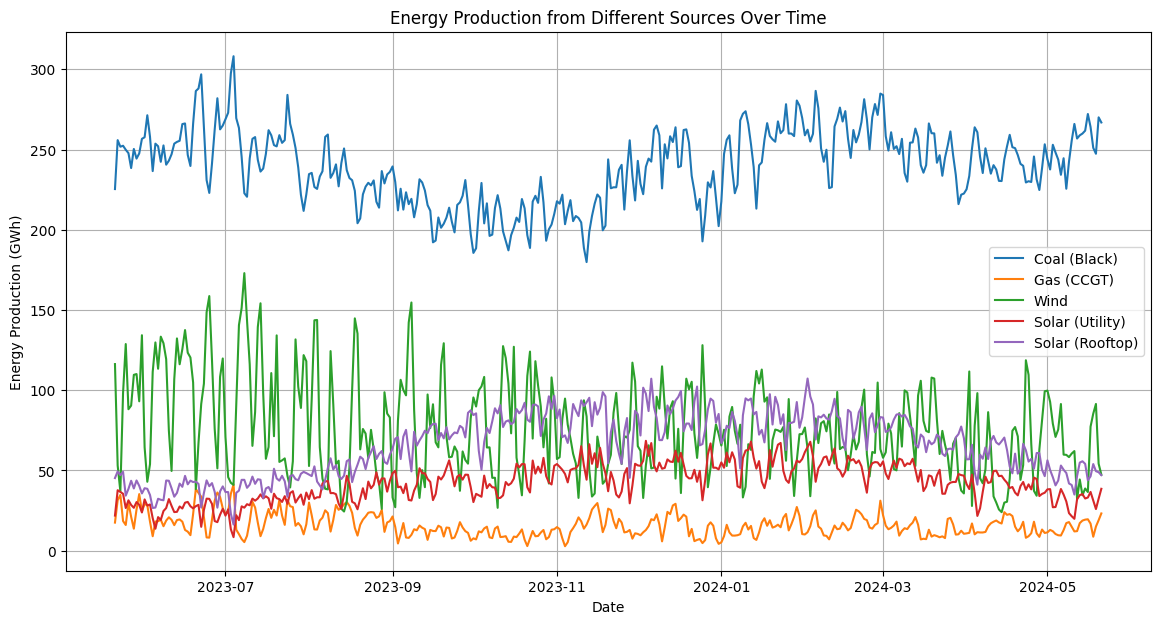

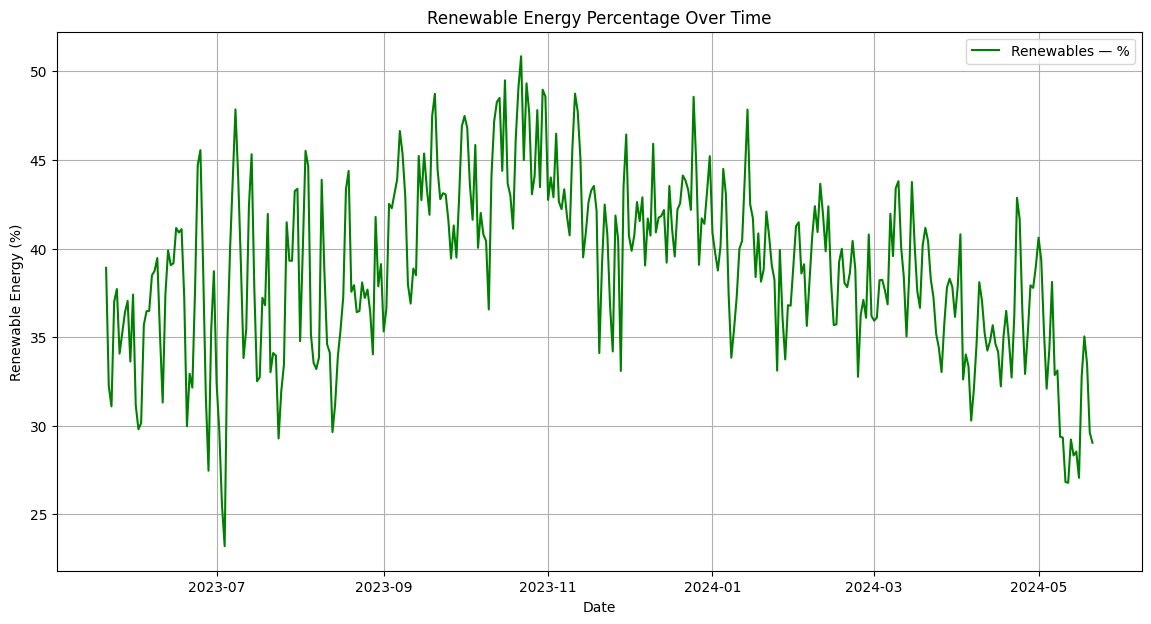

In [5]:
import matplotlib.pyplot as plt

# Convert the date column to datetime format
data['date'] = pd.to_datetime(data['date'])

# Plotting energy production from different sources over time
plt.figure(figsize=(14, 7))

# Energy production from different sources
plt.plot(data['date'], data['Coal (Black) -  GWh'], label='Coal (Black)')
plt.plot(data['date'], data['Gas (CCGT) -  GWh'], label='Gas (CCGT)')
plt.plot(data['date'], data['Wind -  GWh'], label='Wind')
plt.plot(data['date'], data['Solar (Utility) -  GWh'], label='Solar (Utility)')
plt.plot(data['date'], data['Solar (Rooftop) -  GWh'], label='Solar (Rooftop)')

plt.xlabel('Date')
plt.ylabel('Energy Production (GWh)')
plt.title('Energy Production from Different Sources Over Time')
plt.legend()
plt.grid(True)
plt.show()

# Plotting the percentage of renewables over time
plt.figure(figsize=(14, 7))
plt.plot(data['date'], data['Renewables — %'], label='Renewables — %', color='green')
plt.xlabel('Date')
plt.ylabel('Renewable Energy (%)')
plt.title('Renewable Energy Percentage Over Time')
plt.legend()
plt.grid(True)
plt.show()


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 33021 (\N{CJK UNIFIED IDEOGRAPH-80FD}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 28304 (\N{CJK UNIFIED IDEOGRAPH-6E90}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 29983 (\N{CJK UNIFIED IDEOGRAPH-751F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20135 (\N{CJK UNIFIED IDEOGRAPH-4EA7}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 19982 (\N{CJK UNIFIED IDEOGRAPH-4E0E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/

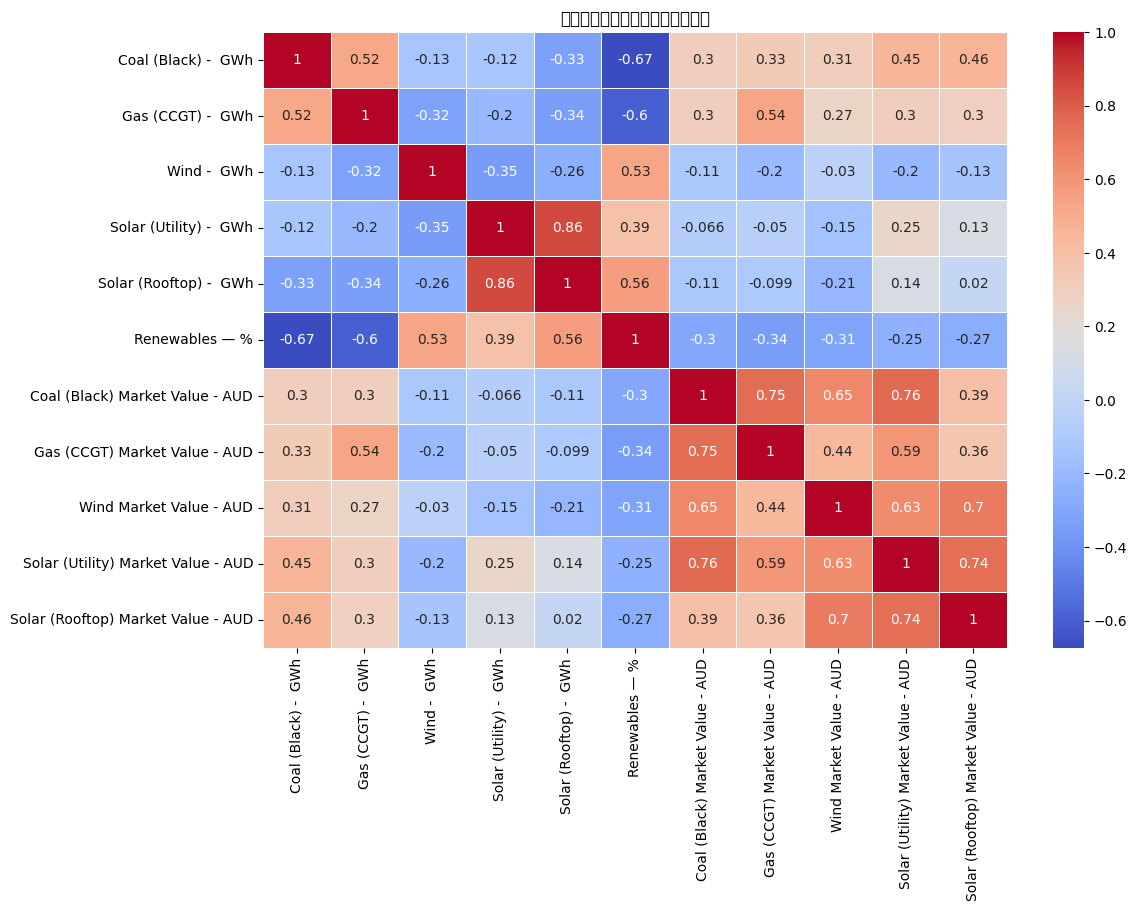

In [6]:
#
columns_of_interest = [
    'Coal (Black) -  GWh', 'Gas (CCGT) -  GWh', 'Wind -  GWh',
    'Solar (Utility) -  GWh', 'Solar (Rooftop) -  GWh', 'Renewables — %',
    'Coal (Black) Market Value - AUD', 'Gas (CCGT) Market Value - AUD',
    'Wind Market Value - AUD', 'Solar (Utility) Market Value - AUD',
    'Solar (Rooftop) Market Value - AUD'
]

#
correlation_matrix = data[columns_of_interest].corr()

import seaborn as sns
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('能源生产与市场价值的相关性矩阵')
plt.show()


#风能数据预处理和拆分

Wind -  GWh    0
dtype: int64


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 39118 (\N{CJK UNIFIED IDEOGRAPH-98CE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 33021 (\N{CJK UNIFIED IDEOGRAPH-80FD}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 29983 (\N{CJK UNIFIED IDEOGRAPH-751F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20135 (\N{CJK UNIFIED IDEOGRAPH-4EA7}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 35757 (\N{CJK UNIFIED IDEOGRAPH-8BAD}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/

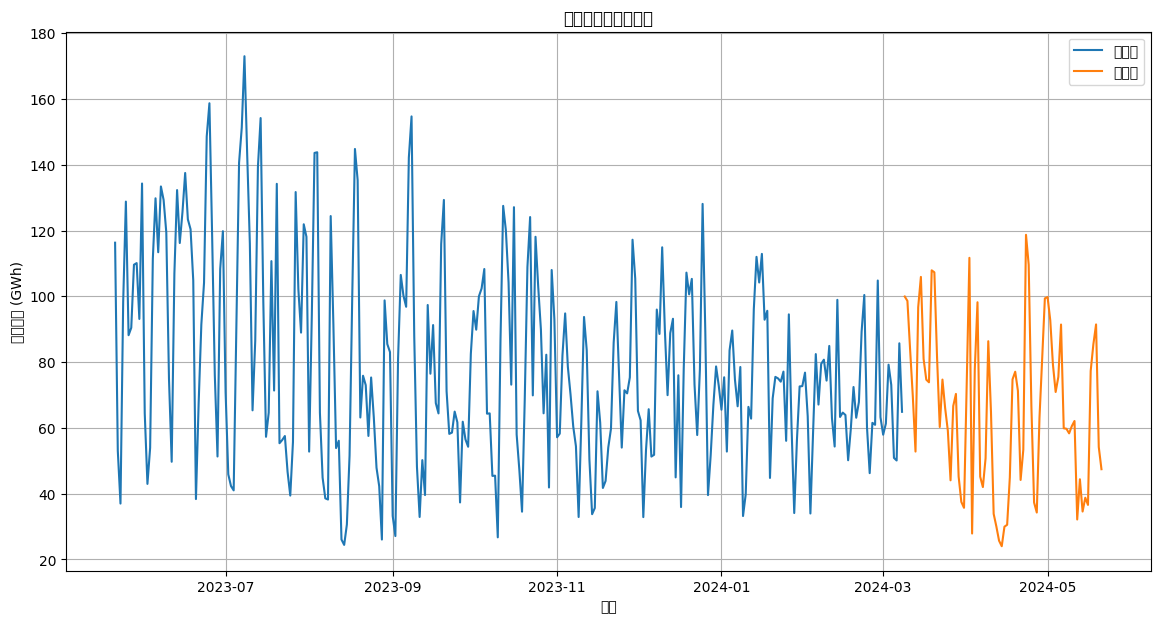

In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import numpy as np

#
wind_data = data[['date', 'Wind -  GWh']].set_index('date')

#
print(wind_data.isna().sum())

#
wind_data = wind_data.fillna(method='ffill')

# （80%，20%）
train_size = int(len(wind_data) * 0.8)
train, test = wind_data[:train_size], wind_data[train_size:]

#
plt.figure(figsize=(14, 7))
plt.plot(train, label='训练集')
plt.plot(test, label='测试集')
plt.xlabel('日期')
plt.ylabel('风能生产 (GWh)')
plt.title('训练集和测试集划分')
plt.legend()
plt.grid(True)
plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:            Wind -  GWh   No. Observations:                  293
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -1377.030
Date:                Thu, 23 May 2024   AIC                           2766.059
Time:                        21:03:40   BIC                           2788.120
Sample:                    05-21-2023   HQIC                          2774.896
                         - 03-08-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2286      0.056     -4.071      0.000      -0.339      -0.119
ar.L2         -0.3803      0.061     -6.267      0.000      -0.499      -0.261
ar.L3         -0.3192      0.060     -5.360      0.0

<ipython-input-8-cece569325dd>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['forecast'] = forecast
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 39118 (\N{CJK UNIFIED IDEOGRAPH-98CE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 33021 (\N{CJK UNIFIED IDEOGRAPH-80FD}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 29983 (\N{CJK UNIFIED IDEOGRAPH-751F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/co

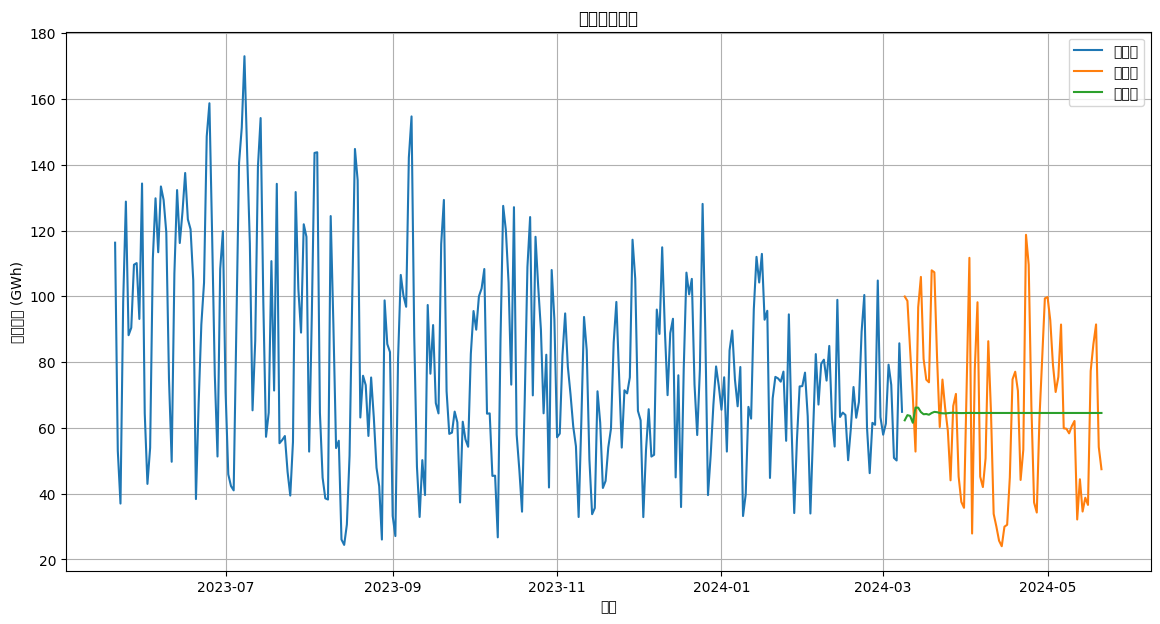

Mean Squared Error: 609.9693507613381


In [8]:
# ARIMA
model = ARIMA(train, order=(5, 1, 0))  # 这里的(5, 1, 0)是一个简单的参数，可以调整
model_fit = model.fit()

#
print(model_fit.summary())

#
forecast = model_fit.forecast(steps=len(test))
test['forecast'] = forecast

#
plt.figure(figsize=(14, 7))
plt.plot(train, label='训练集')
plt.plot(test['Wind -  GWh'], label='测试集')
plt.plot(test['forecast'], label='预测值')
plt.xlabel('日期')
plt.ylabel('风能生产 (GWh)')
plt.title('风能生产预测')
plt.legend()
plt.grid(True)
plt.show()

#
mse = mean_squared_error(test['Wind -  GWh'], test['forecast'])
print(f'Mean Squared Error: {mse}')


<ipython-input-9-0a7068970ad6>:40: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, label='Correlation Coefficient')


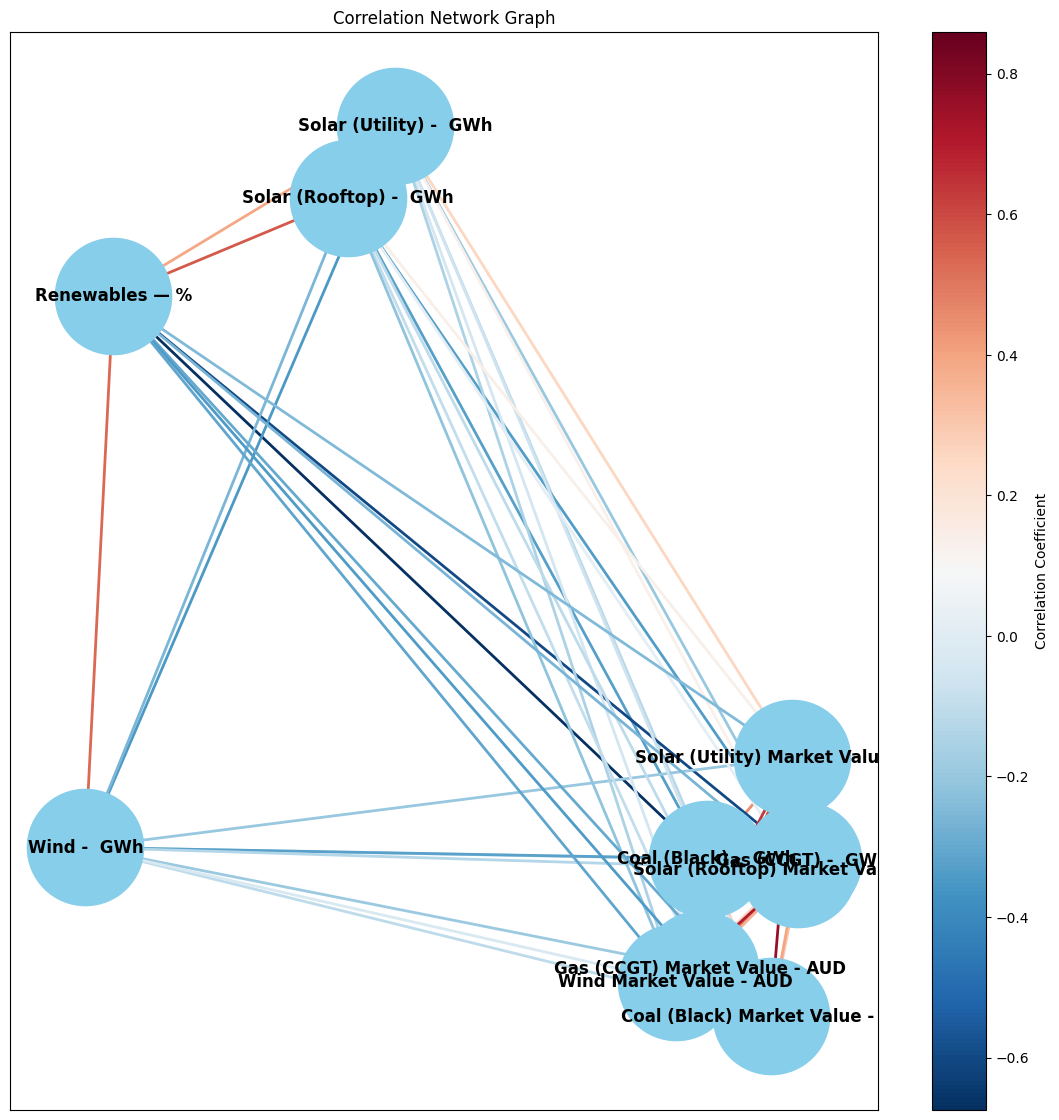

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

# 假设已经有了相关性矩阵 `correlation_matrix`

# 创建网络图
def plot_correlation_network(corr_matrix):
    G = nx.Graph()

    # 添加节点
    for col in corr_matrix.columns:
        G.add_node(col)

    # 添加边
    for i, col1 in enumerate(corr_matrix.columns):
        for j, col2 in enumerate(corr_matrix.columns):
            if i < j:  # 确保每个节点对只处理一次
                weight = corr_matrix.iloc[i, j]
                G.add_edge(col1, col2, weight=weight)

    pos = nx.spring_layout(G, seed=42)  # 使用spring布局进行节点位置布局
    edges = G.edges(data=True)

    # 颜色映射到相关性值
    colors = [edge[2]['weight'] for edge in edges]
    norm = plt.Normalize(min(colors), max(colors))
    edge_colors = plt.cm.RdBu_r(norm(colors))

    # 绘制图形
    plt.figure(figsize=(14, 14))
    nx.draw_networkx_nodes(G, pos, node_size=7000, node_color='skyblue')
    nx.draw_networkx_labels(G, pos, font_size=12, font_weight='bold')
    nx.draw_networkx_edges(G, pos, edge_color=edge_colors, width=2.0)

    # 创建颜色条
    sm = plt.cm.ScalarMappable(cmap='RdBu_r', norm=norm)
    sm.set_array([])
    plt.colorbar(sm, label='Correlation Coefficient')

    plt.title('Correlation Network Graph')
    plt.show()

# 绘制网络图
plot_correlation_network(correlation_matrix)
